#**Myelin Foundary Challenge project**


*   Comments are included wherever necessary
*   Summary, takeaways, references given at the end

https://github.com/saieeshj/Neural-style-transfer/blob/master/myelinfoundry_2019.ipynb 

GitHub link if the notebook is not viewable



## Importing the libraries:

*   "torch" for the implementation of the deep learning algrithm 
*   "PIL" for manipulating the loading images
*    matplotlib
*    numpy





In [0]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
device = ("cuda" if torch.cuda.is_available() else "cpu")


## Using pre-trained vgg-19 module


*   I will be using pre-trained vgg19 module as it is easier to work with for neural network problems. Also it works with a lot of layers and in different scales, so it would probably catch more details about the content and the style.
*   Also setting the grad to false because we won't have to explicitely calculate the gradients as we will not re-train this model, we will just use the pre-trained models.





In [66]:
model = models.vgg19(pretrained=True).features

#Importing the vgg19 module here
for p in model.parameters():
    p.requires_grad = False
model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Defining activations for convolutional layers



*   "conv1,2,3,4,5_1" used to measure style loss
*   "conv4_2" used to measure content loss





In [0]:
def model_activations(input,model):
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    i = input
    i = i.unsqueeze(0)
    for name,layer in model._modules.items():
        i = layer(i)
        if name in layers:
            features[layers[name]] = i 
    
    return features

In [0]:
transform = transforms.Compose([transforms.Resize(250,interpolation=2),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#Transforming the HD images to lesser pixels as my machine won't be able to work on highquality image in a short time

In [0]:
content = Image.open("/content/japanese_garden.jpg").convert("RGB")
content=content.resize((512,512))
content = transform(content).to(device)
print("COntent shape => ", content.shape)
style = Image.open("/content/picasso_selfportrait.jpg").convert("RGB")
style=style.resize((512,512))
style = transform(style).to(device)


#Also resizing the images to get same resolution


COntent shape =>  torch.Size([3, 250, 250])


In [0]:
def imcnvt(image):
    i = image.to("cpu").clone().detach().numpy().squeeze()
    i = i.transpose(1,2,0)
    i = i*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    return i

#This function will take a tensor as the input and use matplotlib to print the image.

Plotting the content and style image:

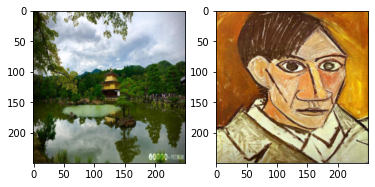

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()

#Testing the imcnvt function and also printing the content, style images once

### Gram Matix 
Taking the multiplication of the feature vector and its transpose

In [0]:
def gram_matrix(imgfeature):
    m,depth,height,weight = imgfeature.size()
    imgfeature = imgfeature.view(depth,height*weight)
    gram_mat = torch.mm(imgfeature,imgfeature.t())
    
    return gram_mat



*   Initializing target image, which is initially the clone of content image
*   Also initializing style weight measures in decreasing order of detail, as suggested in vgg19 module



In [0]:
target = content.clone().requires_grad_(True).to(device)
style_f = model_activations(style,model)
content_f = model_activations(content,model)

style_weight_measure = {"conv1_1" : 0.5, 
                 "conv2_1" : 0.4,
                 "conv3_1" : 0.2,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}

style_grams = {layer:gram_matrix(style_f[layer]) for layer in style_f}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


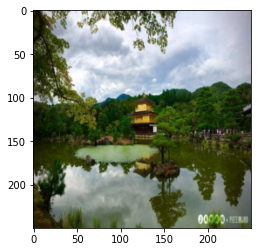

epoch  10   tensor(3.6724e+17, grad_fn=<AddBackward0>)
epoch  20   tensor(2.1622e+17, grad_fn=<AddBackward0>)
epoch  30   tensor(1.2902e+17, grad_fn=<AddBackward0>)
epoch  40   tensor(7.9423e+16, grad_fn=<AddBackward0>)
epoch  50   tensor(5.3472e+16, grad_fn=<AddBackward0>)
epoch  60   tensor(4.0239e+16, grad_fn=<AddBackward0>)
epoch  70   tensor(3.1956e+16, grad_fn=<AddBackward0>)
epoch  80   tensor(2.5623e+16, grad_fn=<AddBackward0>)
epoch  90   tensor(2.0723e+16, grad_fn=<AddBackward0>)
epoch  100   tensor(1.7031e+16, grad_fn=<AddBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


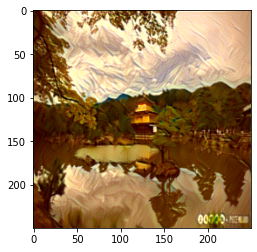

epoch  110   tensor(1.4259e+16, grad_fn=<AddBackward0>)
epoch  120   tensor(1.2151e+16, grad_fn=<AddBackward0>)
epoch  130   tensor(1.0533e+16, grad_fn=<AddBackward0>)
epoch  140   tensor(9.2764e+15, grad_fn=<AddBackward0>)
epoch  150   tensor(8.2849e+15, grad_fn=<AddBackward0>)
epoch  160   tensor(7.4893e+15, grad_fn=<AddBackward0>)
epoch  170   tensor(6.8393e+15, grad_fn=<AddBackward0>)
epoch  180   tensor(6.2992e+15, grad_fn=<AddBackward0>)
epoch  190   tensor(5.8426e+15, grad_fn=<AddBackward0>)
epoch  200   tensor(5.4503e+15, grad_fn=<AddBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


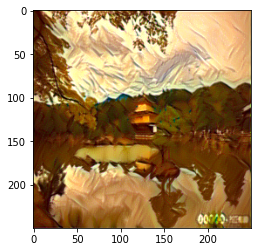

In [0]:
loss=np.empty(201)
content_weight = 1000
style_weight = 1e8

#Style weight kept higher than content weight so as to capture more style image qualities

print_after_epochs = 100
epochs = 200

#200 iterations used anf output printed after every 100 iteration

optimizer = torch.optim.Adam([target],lr=0.007)
for i in range(1,epochs+1):
    target_f = model_activations(target,model)
    #target features called from model activation funcation in which vgg19 conv layers were defined

    content_loss = torch.mean((content_f['conv4_2']-target_f['conv4_2'])**2)
    #For content loss, square loss is used from the conv4_2 layer of the content image

    style_loss = 0
    for layer in style_weight_measure:
        style_gram = style_grams[layer]
        target_gram = target_f[layer]
        m,depth,height,weight = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_weight_measure[layer]*torch.mean((target_gram-style_gram)**2))/depth*weight*height

        #Calculating style lost by gram matrix and then normalizing it by divigind by d,w,h
    
    total_loss = content_weight*content_loss + style_weight*style_loss 
    #Total loss would be: alpha*a+beta*b which is written above
    
    if i%10==0:       
        print("epoch ",i," ", total_loss)
    loss[i]=total_loss

    #This is to print the loss after every 10 iterations
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    #Implementing optimizer and backward propagation too


    if i%print_after_epochs == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()

    if i==1:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()


## Total Loss curve

We can see that over 200 iterations the total loss has minimized and we have got our neural style transfer image.

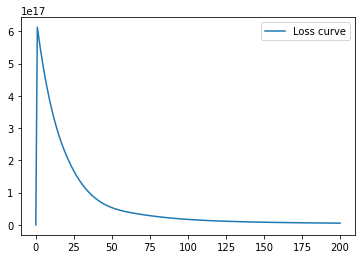

In [0]:
plt.plot(loss,label='Loss curve')
plt.legend(loc='best')
plt.show()

Over the iterations the target image developed as follows. Images printed after 50 iterations each, last bieng the final image(200 epoch)


![alt text](https://drive.google.com/uc?id=1OFZLgQ9Wd1JtTCpyVFdj8H3qkA6jzMIf)
![alt text](https://drive.google.com/uc?id=1FIlKk22iLmcEUL5K5OgFj3EKCtH63pLZ)
![alt text](https://drive.google.com/uc?id=1TJ0TPtusim3nL86_M76CNnLU762VmGds)
![alt text](https://drive.google.com/uc?id=1mAwXdfD_SwMy-BtppdcPLOHiOusAYzVA)
![alt text](https://drive.google.com/uc?id=1B7DcInG7IqquU4iFqMOA-4-03c_9QXTN)


# Summary to the algorithm/code


*   First we downloaded the vgg-19 pretrained module to obtain feature representations of intermediate layers
*   Then the images were loaded and converted into tensors by converting them into feasible sizes
*   After this, gram matrix and style weight measures were initiallized in decreasing order of detail, as suggested in vgg19 module. This took a lot of iterations to find the perfect weights
*   Total loss was found out by first calculating the style loss and content loss. Content loss was caluclted by square loss but the style loss was a bit tricky. Style loss was calculated by going over all the convolutional layers in "style_weight_measure" and then gram matrix, optimizers were used to apply optimization and backward propagation.
*   "imcnvt" function was called again and again to convert these optimized tensors into visualizable images
*   The final image by implementing neural style transfer was generated at 200 epochs, which can be seen in the plot above too.

# Takeaways from this project/challenge


*   Learnt more in depth about the vgg-19 module and its pre-trained layers
*   Got more aquiantance with the pytorch library. Earlier I used to do neural networks with tensorflow but tried to work with pytorch this time


## Problem faced during the challenge


*   It was recommended to do this challenge in two subproblems. It was to construct an initial target image from scratch using the content image. 

* But while implementing this in my code, I was getting a lot of noise in the final image so I directly cloned the initial target image with the content image and then went for the optimization of the total loss.


### Final answer:

![alt text](https://drive.google.com/uc?id=1IsgJeDamSSed2KVVd-VG71IL68VTmMCi)








### References


*   External imported module(vgg-19):  `model = models.vgg19(pretrained=True).features`
*    For the documentation of pytorch: https://pytorch.org/docs/stable/torchvision/models.html
*    Some help for pytorch syntax and combination with vgg19: https://www.youtube.com/watch?v=K0j9AqcFsiw
